In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA

wine = datasets.load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

In [6]:
target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Text(0, 0.5, 'b')

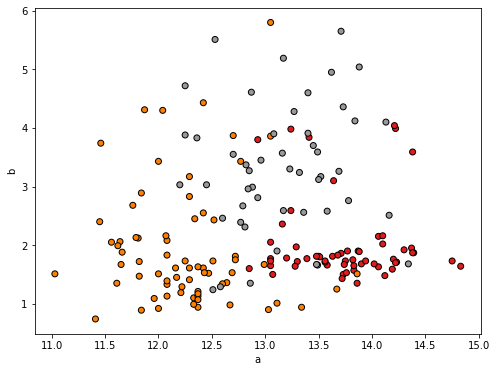

In [7]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("a")
plt.ylabel("b")

In [8]:
# Encode categorical class labels
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(y)

In [9]:
# Standardize features
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X)

In [6]:
# Construct Within-class covariance matrix S_W
S_W = np.zeros((13,13))
for i in range(3):
    S_W += np.cov(X_train_std[y==i].T)
print('Within-class covariance matrix')    
print(S_W)

Within-class covariance matrix
[[ 1.19647451e+00  4.34223711e-02 -1.26705588e-01 -8.33363872e-02
   1.53810496e-03  1.82343365e-01  9.11958846e-02 -1.51959785e-02
   1.70527404e-01  4.26014900e-01  1.09087094e-02 -7.36877635e-03
   1.38214859e-01]
 [ 4.34223711e-02  2.16680854e+00  1.81690927e-01  3.02867184e-01
  -1.76869964e-01 -8.63895119e-02 -5.59108382e-02  2.24473460e-01
   1.01013862e-02 -3.17786316e-01 -4.24731483e-01  1.57632920e-01
  -2.63763065e-01]
 [-1.26705588e-01  1.81690927e-01  2.47501318e+00  1.50247288e+00
   5.18396811e-01  2.96831495e-01  2.89082986e-01  5.49876813e-01
   5.87683742e-02  5.69941268e-02  1.30607624e-01  1.54196624e-01
  -2.95197306e-02]
 [-8.33363872e-02  3.02867184e-01  1.50247288e+00  2.05626219e+00
   2.20853684e-01  1.61229167e-01  1.88526864e-01  3.02350106e-01
   1.47566766e-01 -1.20974447e-02 -2.30576970e-02  2.35035215e-01
  -9.78710521e-02]
 [ 1.53810496e-03 -1.76869964e-01  5.18396811e-01  2.20853684e-01
   2.51184012e+00  1.77720036e-01  

In [7]:
# Construct between-class scatter matrix S_B
N=np.bincount(y) # number of samples for given class
vecs=[]
[vecs.append(np.mean(X_train_std[y==i],axis=0)) for i in range(3)] # class means
mean_overall = np.mean(X_train_std, axis=0) # overall mean
S_B=np.zeros((13,13))
for i in range(3):
    S_B += N[i]*(((vecs[i]-mean_overall).reshape(13,1)).dot(((vecs[i]-mean_overall).reshape(1,13))))

In [8]:
print('between-class scatter matrix') 
print(S_B)

between-class scatter matrix
[[ 1.08024413e+02  1.52166913e+01  4.81716030e+01 -4.89111895e+01
   4.79298954e+01  4.20737915e+01  3.72413231e+01 -2.60561750e+01
   1.79800909e+01  7.42067274e+01 -1.35127627e+01  1.43992673e+01
   1.06158181e+02]
 [ 1.52166913e+01  5.28427247e+01  1.69170351e+01  3.17881710e+01
   9.49325389e-02 -5.60136885e+01 -7.16752011e+01  3.92701096e+01
  -4.40277363e+01  6.18988049e+01 -7.08724430e+01 -7.59544841e+01
  -1.76401893e+01]
 [ 4.81716030e+01  1.69170351e+01  2.35058845e+01 -1.40819314e+01
   2.00432807e+01  6.38430667e+00  1.23568451e+00 -3.03834475e+00
  -1.28644233e+00  4.33717969e+01 -1.98081069e+01 -9.16248978e+00
   4.08260117e+01]
 [-4.89111895e+01  3.17881710e+01 -1.40819314e+01  5.16530127e+01
  -2.67799369e+01 -6.63038269e+01 -7.55444905e+01  4.45565634e+01
  -4.36615463e+01  5.64824771e+00 -4.64974829e+01 -6.60120261e+01
  -7.29318460e+01]
 [ 4.79298954e+01  9.49325389e-02  2.00432807e+01 -2.67799369e+01
   2.21402503e+01  2.68004880e+01  2.

In [9]:
# Calculate sorted eigenvalues and eigenvectors of inverse(S_W)dot(S_B)
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

546.4164942544577
243.23261924246472
4.5835780765197526e-14
4.1905735920912553e-14
4.1905735920912553e-14
3.821794502119329e-14
3.821794502119329e-14
2.842170943040401e-14
1.434066160703452e-14
1.434066160703452e-14
1.04667327402484e-14
5.510495047105866e-15
9.11687198969391e-16


In [10]:
print('Trị riêng : \n {}'.format(eigen_vals))
print('\n')
print('Vecto riêng : \n {}'.format(eigen_vecs))
# Sắp xếp các trị riêng theo thứ tự giảm dần
sort_index1 = np.argsort(eigen_vals)[::-1]
sort_eigen_vals = eigen_vals[sort_index1]
# Sắp xếp các vector riêng tương ứng với trị riêng đó
sort_eigen_vecs = eigen_vecs[:,sort_index1]

Trị riêng : 
 [ 2.84217094e-14+0.00000000e+00j  2.43232619e+02+0.00000000e+00j
  5.46416494e+02+0.00000000e+00j -3.45538609e-14+1.63291769e-14j
 -3.45538609e-14-1.63291769e-14j  4.58357808e-14+0.00000000e+00j
  2.82063017e-14+3.09918577e-14j  2.82063017e-14-3.09918577e-14j
 -6.10718558e-15+1.29752403e-14j -6.10718558e-15-1.29752403e-14j
  1.04667327e-14+0.00000000e+00j  5.51049505e-15+0.00000000e+00j
 -9.11687199e-16+0.00000000e+00j]


Vecto riêng : 
 [[ 0.77517342+0.j         -0.42245863+0.j         -0.13011329+0.j
  -0.62773679+0.j         -0.62773679-0.j          0.53169666+0.j
   0.4825571 +0.j          0.4825571 -0.j         -0.30818385-0.09726335j
  -0.30818385+0.09726335j  0.62828276+0.j         -0.51179052+0.j
   0.23093442+0.j        ]
 [-0.10552807+0.j         -0.18232159+0.j          0.07253127+0.j
  -0.06618453-0.08741205j -0.06618453+0.08741205j -0.00469744+0.j
  -0.13556627+0.00306465j -0.13556627-0.00306465j  0.20229576-0.18203529j
   0.20229576+0.18203529j -0.20264973+0

In [11]:
print('Variance explained:\n')
eigv_sum = sum(eigen_vals)
for i,j in enumerate(eigen_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 69.20%
eigenvalue 2: 30.80%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%
eigenvalue 9: 0.00%
eigenvalue 10: 0.00%
eigenvalue 11: 0.00%
eigenvalue 12: 0.00%
eigenvalue 13: 0.00%


In [12]:
# Project original features onto the new feature space
W=np.hstack((eigen_pairs[0][1][:, ].reshape(13,1),eigen_pairs[1][1][:, ].reshape(13,1))).real
X_train_lda = X_train_std.dot(W*-1)

In [13]:
#Transformed features in LDA subspace
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,2.063220,1.127717,0
1,1.832634,0.711564,0
2,1.530293,0.798860,0
3,1.882749,2.341960,0
4,0.664820,0.285375,0


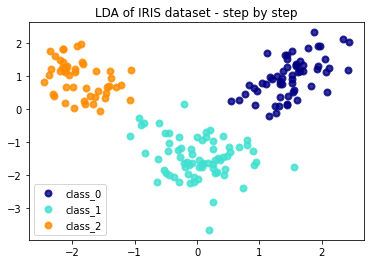

In [14]:
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_train_lda[y == i, 0], X_train_lda[y == i, 1], color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset - step by step')

plt.show()

# Dùng thư viện sklearn

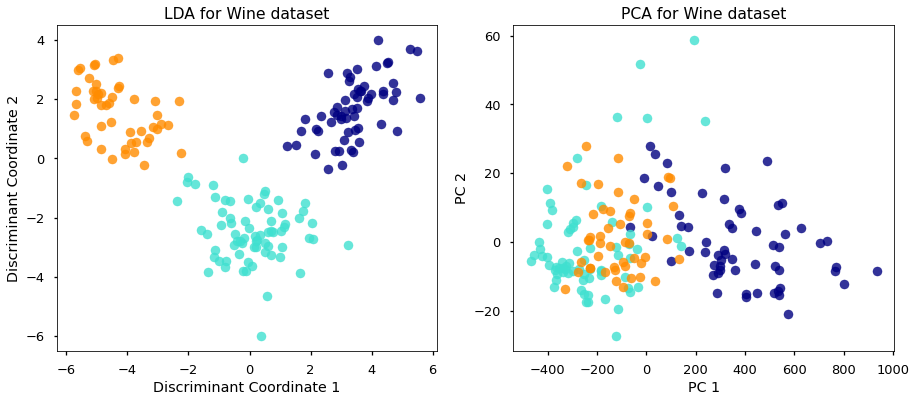

In [15]:
X_r_lda = LinearDiscriminantAnalysis(n_components=2).fit(X, y).transform(X)
X_r_pca = PCA(n_components=2).fit(X).transform(X)

with plt.style.context('seaborn-talk'):
    fig, axes = plt.subplots(1,2,figsize=[15,6])
    colors = ['navy', 'turquoise', 'darkorange']
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        axes[0].scatter(X_r_lda[y == i, 0], X_r_lda[y == i, 1], alpha=.8, label=target_name, color=color)
        axes[1].scatter(X_r_pca[y == i, 0], X_r_pca[y == i, 1], alpha=.8, label=target_name, color=color)
    axes[0].title.set_text('LDA for Wine dataset')
    axes[1].title.set_text('PCA for Wine dataset')
    axes[0].set_xlabel('Discriminant Coordinate 1')
    axes[0].set_ylabel('Discriminant Coordinate 2')
    axes[1].set_xlabel('PC 1')
    axes[1].set_ylabel('PC 2')